In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

import pandas as pd

In [2]:
def f(x):
    return np.sin(x)

def shift_scale(x):
    return np.pi / 2.0 * x

In [3]:
# Helper functions

# Display training progress by printing a single dot for each completed epoch
class print_dot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 500 == 0: print('')
        if epoch % 10 == 0: print('.', end='')
        
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.semilogy(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.semilogy(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.legend()
    plt.ylim([1e-16,1e2]) 


def plot_layers(model):
    plt.subplot(1,2,1)
    weights = model.layers[0].get_weights()[0]
    plt.hist(weights[0,:]); plt.title('weights layer 0')
    plt.subplot(1,2,2)
    weights = model.layers[1].get_weights()[0]
    plt.hist(weights[0,:]); plt.title('weights layer 1')

    plt.figure()
    plt.subplot(1,2,1)
    biases = model.layers[0].get_weights()[1]
    plt.hist(biases); plt.title('biases layer 0');
    plt.subplot(1,2,2)
    biases = model.layers[1].get_weights()[1]
    plt.hist(biases); plt.title('biases layer 1')
    
def plot_prediction(data,fun,model):
    result = model.predict(data)
    plt.plot(data, fun, 's', label='data')
    plt.plot(data, result, 'o', label='DNN')
    plt.plot(data, f(shift_scale(data)), '+', label='f(x)')
    plt.legend()

    data_curve = np.linspace(-1,1,512)
    result_curve = model.predict(data_curve)

    plt.figure()
    plt.plot(data_curve, result_curve, label='DNN')
    plt.plot(data_curve, f(shift_scale(data_curve)), label='f(x)')
    plt.legend();

In [4]:
# Initializers

# Matrix initialization
k_init = tf.keras.initializers.RandomUniform(minval=-2.5, maxval=2.5)

# Bias initialization
b_init = tf.keras.initializers.RandomUniform(minval=-2.5, maxval=2.5)

# Training set and validation set
t0 = np.linspace(-1,1,32)
# t1 = t0**3
data = 0.8 * t0
fun = f(shift_scale(data)) + 0.5 * ( np.random.random(32) - 0.5 )

val_data = np.linspace(-1,1,256)
val_fun = f(shift_scale(val_data))

# Optimizer
optim = tf.keras.optimizers.SGD(lr=0.001)

# Activation function
activ_fun = tf.keras.activations.relu;

# Number of nodes in each layer
n_node = 32

# Number of epochs to train
n_epoch = 4000

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________

..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..............................................

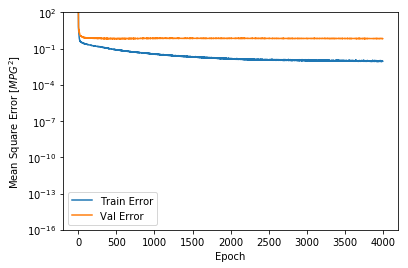

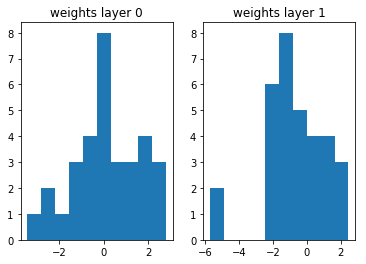

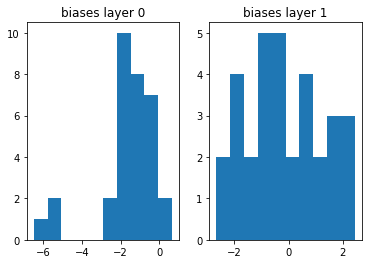

In [5]:
model = tf.keras.Sequential()

# Densely-connected layer
model.add(layers.Dense(n_node, activation=activ_fun, input_shape=(1,),
                       kernel_initializer=k_init, bias_initializer=b_init))
# Add another
model.add(layers.Dense(n_node, activation=activ_fun,
                       kernel_initializer=k_init, bias_initializer=b_init))
# 1 output unit
model.add(layers.Dense(1, kernel_initializer=k_init, bias_initializer=b_init))

# Overfitting case
model.compile(optimizer=optim, loss='mse', metrics=['mse'])

model.summary()

history = model.fit(data, fun, epochs=n_epoch, validation_data=(val_data, val_fun),
                    batch_size=8, verbose = 0, callbacks=[print_dot()])

hist = pd.DataFrame(history.history); hist['epoch'] = history.epoch

print(''); print(hist.tail())

plot_history(history)

plt.figure()
plot_layers(model)

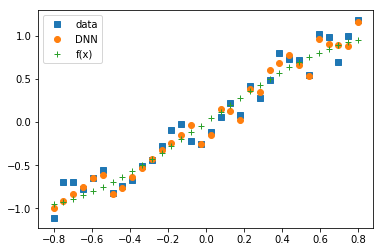

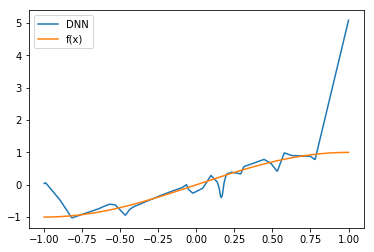

In [6]:
# Prediction 
plot_prediction(data,fun,model);


..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
       val_loss  val_mean_squared_error       loss  mean_squared_error  epoch
3995  18.957981                0.014049  18.982254            0.023279   3995
3996  18.942950                0.014054  18.967213            0.023281   3996
3997  18.927938                0.014060  18.952181            0.023285   3997
3998  18.912935                0.014065  18.937166            0.023287   3998
3999  18.897945                0.014070  18.922161            0.023290   3999


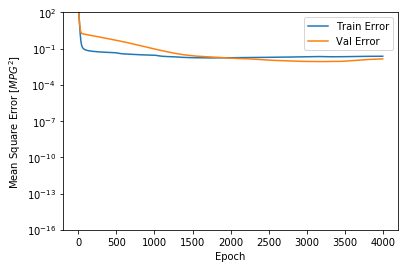

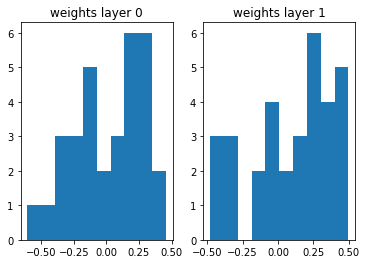

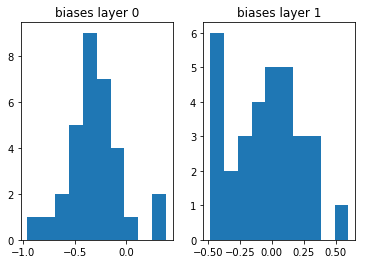

In [7]:
# With l2 regularization
regz = tf.keras.regularizers.l2(0.2)

model = tf.keras.Sequential()

# Densely-connected layer
model.add(layers.Dense(n_node, activation=activ_fun, input_shape=(1,),
                       kernel_initializer=k_init, bias_initializer=b_init,
                       kernel_regularizer=regz,bias_regularizer=regz))
# Add another
model.add(layers.Dense(n_node, activation=activ_fun,
                       kernel_initializer=k_init, bias_initializer=b_init,
                       kernel_regularizer=regz,bias_regularizer=regz))
# 1 output unit
model.add(layers.Dense(1, kernel_initializer=k_init, bias_initializer=b_init))

# Train
model.compile(optimizer=optim, loss='mse', metrics=['mse'])

history = model.fit(data, fun, epochs=n_epoch, validation_data=(val_data, val_fun),
                    batch_size=data.size, verbose = 0, callbacks=[print_dot()])

hist = pd.DataFrame(history.history); hist['epoch'] = history.epoch

print(''); print(hist.tail())

plot_history(history)

plt.figure()
plot_layers(model)

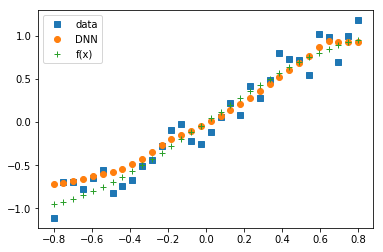

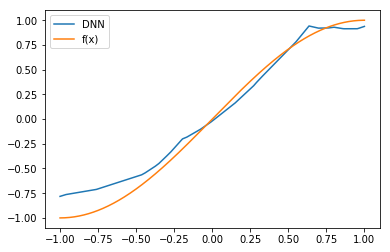

In [8]:
# Prediction 
plot_prediction(data,fun,model);